In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue_data = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue_data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue_data.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [6]:
dengue_data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue_data.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [8]:
dengue_data.unstack()

Month          0        January
               1       February
               2          March
               3          April
               4            May
                         ...   
Dengue_Deaths  1015           0
               1016           8
               1017           9
               1018           1
               1019           0
Length: 5100, dtype: object

In [9]:
dengue_data['Month'] = dengue_data['Month'].astype('category')
dengue_data['Region'] = dengue_data['Region'].astype('category')

In [10]:
dengue_data.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [11]:
dengue_data['Dengue_Deaths'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1020 entries, 0 to 1019
Series name: Dengue_Deaths
Non-Null Count  Dtype
--------------  -----
1020 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


<h1>Question 1.</h1>
<h1>What is the correlation between dengue cases and death</h1>

In [12]:
correlation = dengue_data['Dengue_Cases'].corr(dengue_data['Dengue_Deaths'])
correlation

np.float64(0.03832213720419488)

<h1>Insight No.1</h1>
<h2>There is a correlation between dengue cases and death</h2>

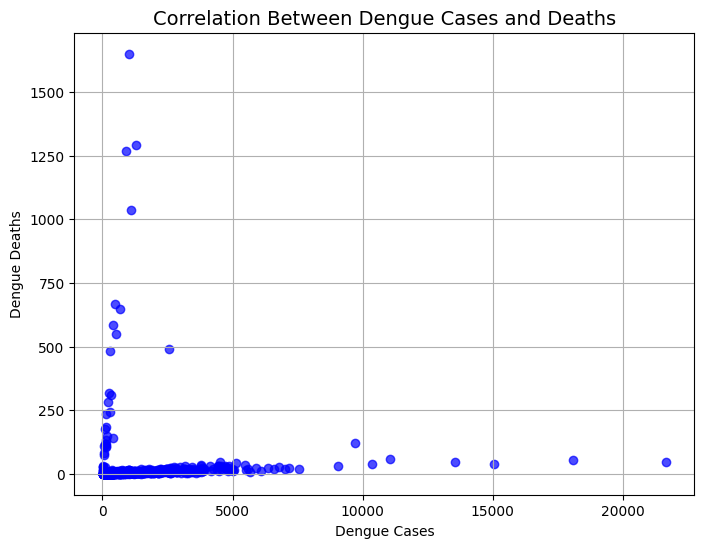

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(dengue_data['Dengue_Cases'], dengue_data['Dengue_Deaths'], color='blue', alpha=0.7)
plt.title('Correlation Between Dengue Cases and Deaths', fontsize=14)
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.grid()
plt.show()

<h1>Insight 1.</h1>
<h2>Analyzing cases and deaths over time can reveal if the problem is worsening, improving, or showing patterns.</h2>
<h2></h2>

<h1>Question 2.</h1>
<h2>Regions with the highest dengue cases and deaths</h2>


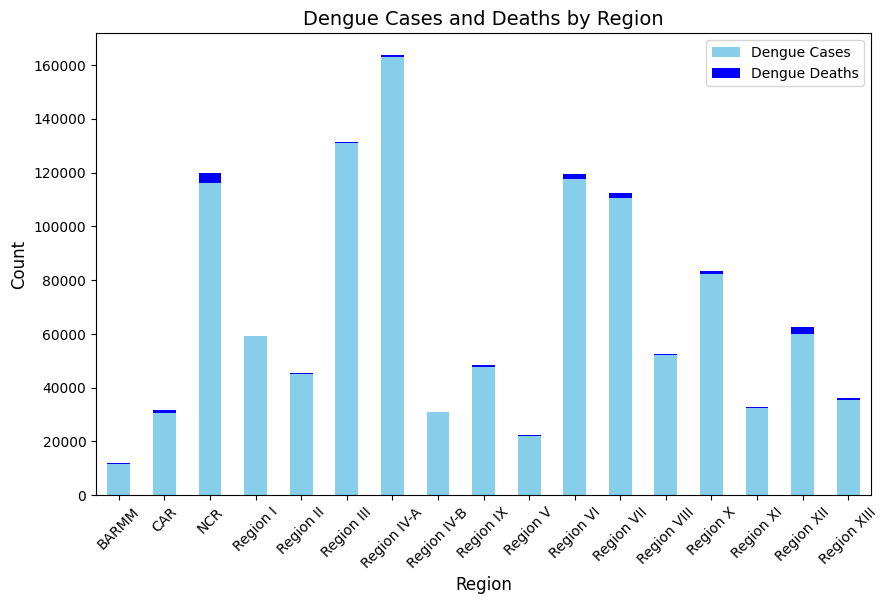

In [54]:
region_data = dengue_data.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

region_data.plot(kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'blue'])
plt.title('Dengue Cases and Deaths by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Dengue Cases', 'Dengue Deaths'])
plt.show()


<h1>Insight 2.</h1>
<h2>By comparing regions, we can pinpoint which areas are struggling the most.</h2>

<h1>Question 3.</h1>
<h2>Is there a significant correlation between dengue cases and dengue deaths?</h2>

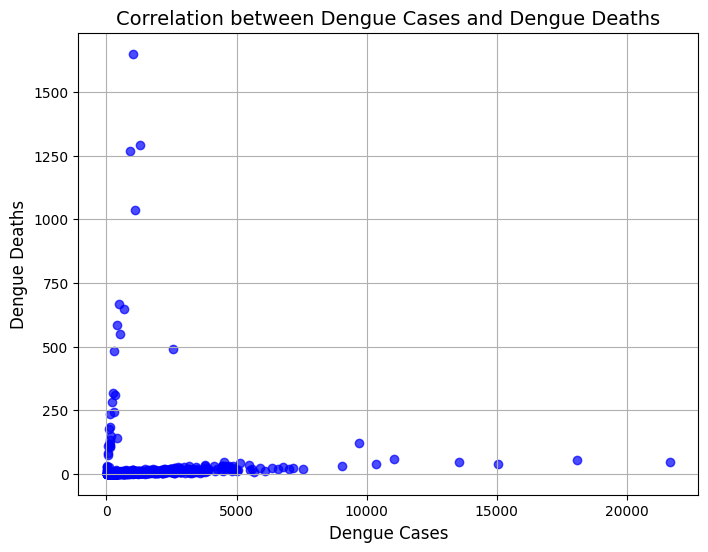

In [52]:
correlation = dengue_data['Dengue_Cases'].corr(dengue_data['Dengue_Deaths'])
plt.figure(figsize=(8, 6))
plt.scatter(dengue_data['Dengue_Cases'], dengue_data['Dengue_Deaths'], alpha=0.7, color='blue') 
plt.title('Correlation between Dengue Cases and Dengue Deaths', fontsize=14)
plt.xlabel('Dengue Cases', fontsize=12)
plt.ylabel('Dengue Deaths', fontsize=12)
plt.grid()
plt.show()

<h1> Insight 3.</h1>
<h2>A strong correlation suggests that higher cases often lead to more deaths, while a weak correlation might highlight other influencing factors like healthcare access or outbreak severity.</h2>

<h1>Question 4.</h1>
<h2>What is the case-to-death ratio across different regions and years?</h2>

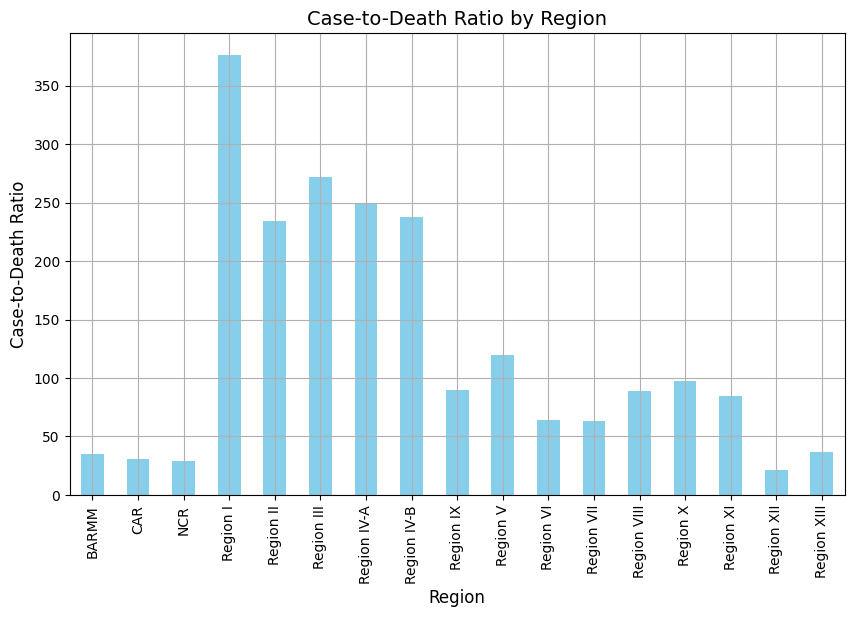

In [50]:
region_data = region_data.sort_index()
region_data['Case_to_Death_Ratio'] = region_data['Dengue_Cases'] / region_data['Dengue_Deaths']
region_data['Case_to_Death_Ratio'].plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Case-to-Death Ratio by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Case-to-Death Ratio', fontsize=12)
plt.grid()
plt.show()

<h1> Insight 4.</h1>

<h1> Question 5.</h1>
<h2>What is the month with the highest dengue deaths?</h2>

In [17]:
monthly_deaths = dengue_data.groupby('Month')['Dengue_Deaths'].sum()
highest_death_month = monthly_deaths.idxmax()
highest_death_value = monthly_deaths.max()

print(f"The month with the highest dengue deaths: {highest_death_month} ({highest_death_value} deaths)")


The month with the highest dengue deaths: October (6670 deaths)


<h1> Insight 5.1</h1>
<h2>Highlighting the Peak Month</h2>

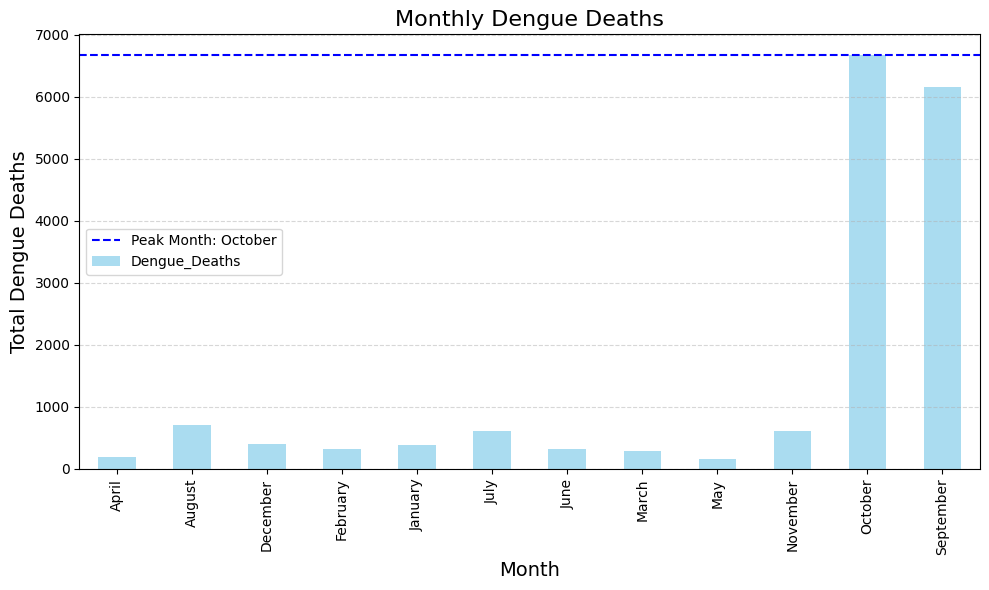

In [48]:
plt.figure(figsize=(10, 6))
monthly_deaths.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Monthly Dengue Deaths', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Dengue Deaths', fontsize=14)
plt.axhline(y=highest_death_value, color='blue', linestyle='--', label=f'Peak Month: {highest_death_month}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1>Insight 5.2</h1>
<h2>Identifying Patterns in Low-Death Months</h2>

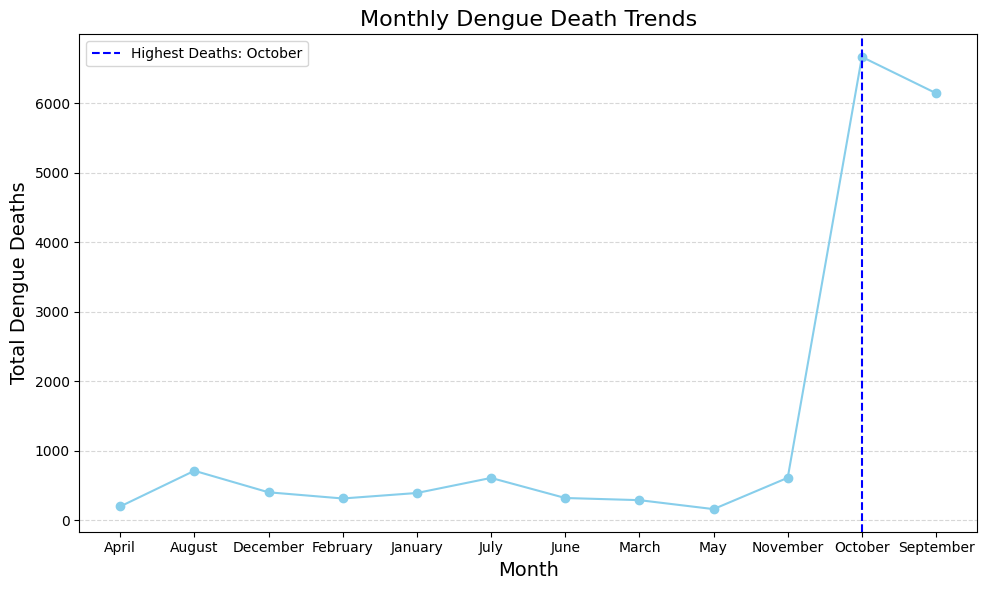

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o', color='skyblue')
plt.title('Monthly Dengue Death Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Dengue Deaths', fontsize=14)
plt.axvline(x=highest_death_month, color='blue', linestyle='--', label=f'Highest Deaths: {highest_death_month}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Question 6.</h1>
<h2>Are there significant differences in dengue cases across months of the year?</h2>

In [20]:
monthly_summary = dengue_data.groupby('Month')['Dengue_Cases'].describe()
print(monthly_summary)

           count         mean          std   min    25%     50%     75%  \
Month                                                                     
April       85.0   382.447059   292.502157  18.0  167.0   286.0   557.0   
August      85.0  2206.517647  2853.048698  41.0  473.0  1265.0  2877.0   
December    85.0  1040.364706  1110.789025  21.0  208.0   581.0  1522.0   
February    85.0   915.305882   809.513949  59.0  313.0   600.0  1243.0   
January     85.0   992.094118   839.217090  74.0  324.0   659.0  1476.0   
July        85.0  1626.376471  1924.179714  47.0  433.0  1025.0  2330.0   
June        85.0   683.647059   748.904465  30.0  241.0   492.0   832.0   
March       85.0   677.364706   541.868238  25.0  235.0   478.0  1006.0   
May         85.0   381.023529   315.044100  17.0  165.0   293.0   504.0   
November    85.0  1116.470588  1214.843215  12.0  242.0   649.0  1724.0   
October     85.0  1384.058824  1728.776841  10.0  261.0   710.0  1903.0   
September   85.0  2093.44

<h1>Inisght 6.1</h1>
<h2>Months with wider boxes and higher medians in the box plot indicate peak dengue outbreaks and unpredictable case numbers. Outliers highlight unusual spikes or localized outbreaks that need special attention.</h2>

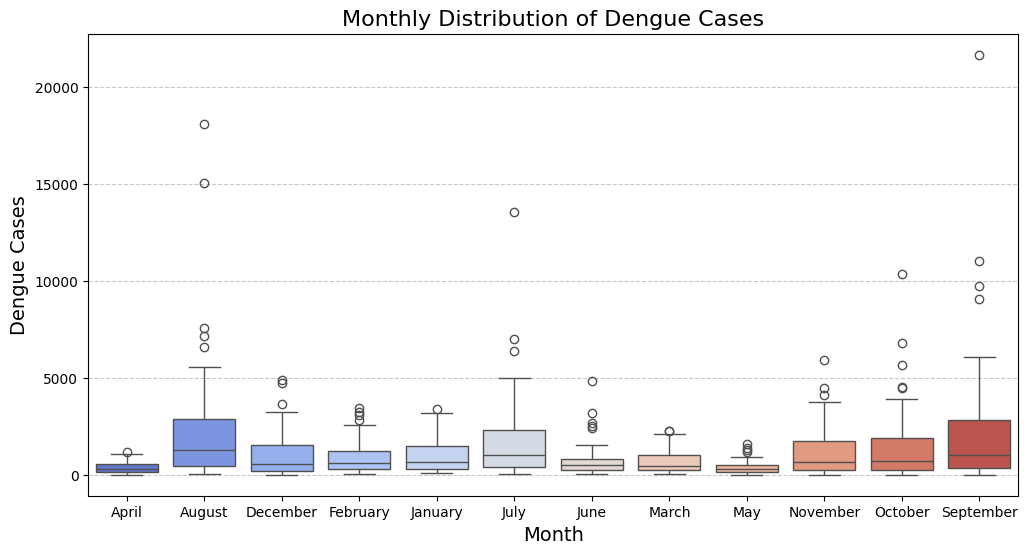

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Dengue_Cases', data=dengue_data, palette='coolwarm')
plt.title('Monthly Distribution of Dengue Cases', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Dengue Cases', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>Insight 6.2</h1>
<h2>Months with a wider range of dengue cases suggest unpredictable outbreaks, which may require additional investigation and readiness for response during those months.</h2>

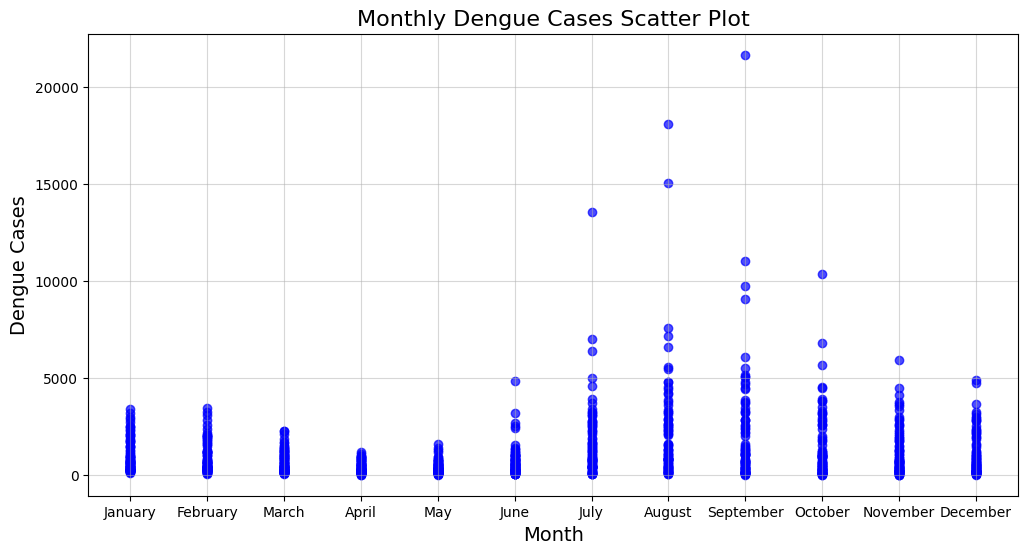

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(dengue_data['Month'], dengue_data['Dengue_Cases'], alpha=0.7, color='blue')
plt.title('Monthly Dengue Cases Scatter Plot', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Dengue Cases', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

<h1> Question 7.</h1>
<h1>Do urban areas have more dengue cases than rural areas?</h1>

In [23]:
urban_rural_data = dengue_data.groupby('Region')['Dengue_Cases'].sum()
print(urban_rural_data)

Region
BARMM           11537
CAR             30582
NCR            115966
Region I        59066
Region II       45141
Region III     131064
Region IV-A    163029
Region IV-B     30849
Region IX       47781
Region V        22167
Region VI      117523
Region VII     110683
Region VIII     51983
Region X        82437
Region XI       32522
Region XII      59802
Region XIII     35293
Name: Dengue_Cases, dtype: int64


<h1> Insight 7.1</h1>
<h2>Urban areas often have higher dengue cases due to population density and environmental factors.</h2>

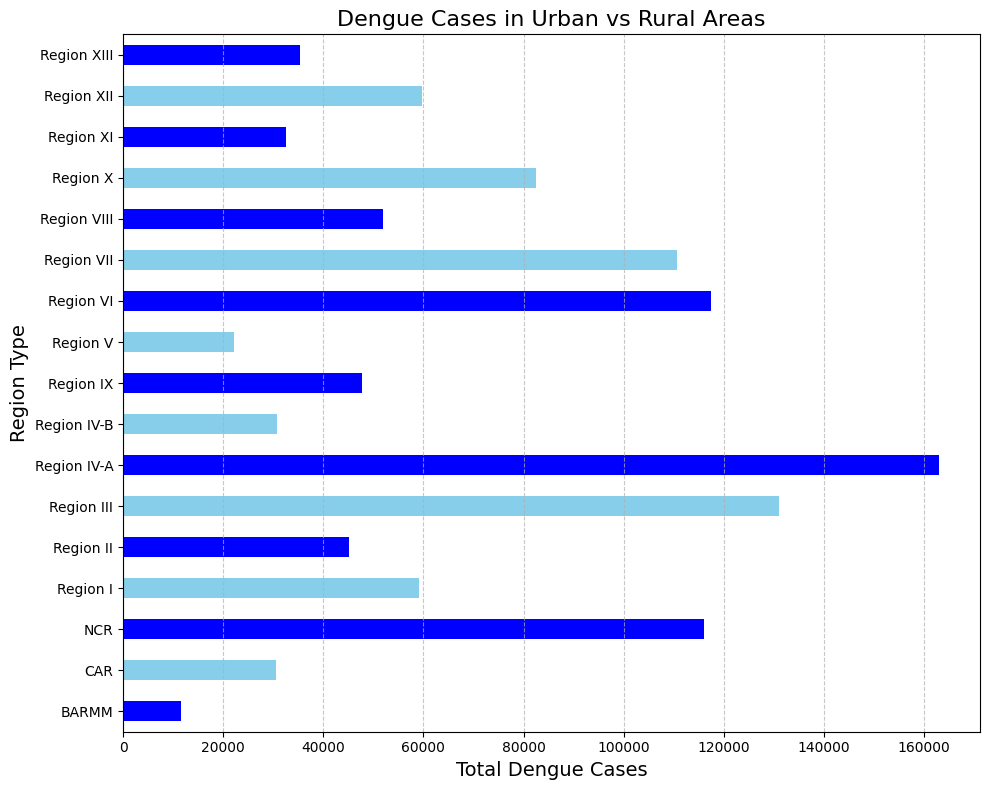

In [41]:
plt.figure(figsize=(10, 8))
urban_rural_data.plot(kind='barh', color=['blue', 'skyblue'])
plt.title('Dengue Cases in Urban vs Rural Areas', fontsize=16)
plt.xlabel('Total Dengue Cases', fontsize=14)
plt.ylabel('Region Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h1> Insight 7.2</h1>
<h2>Rural Areas with Higher Cases</h2>

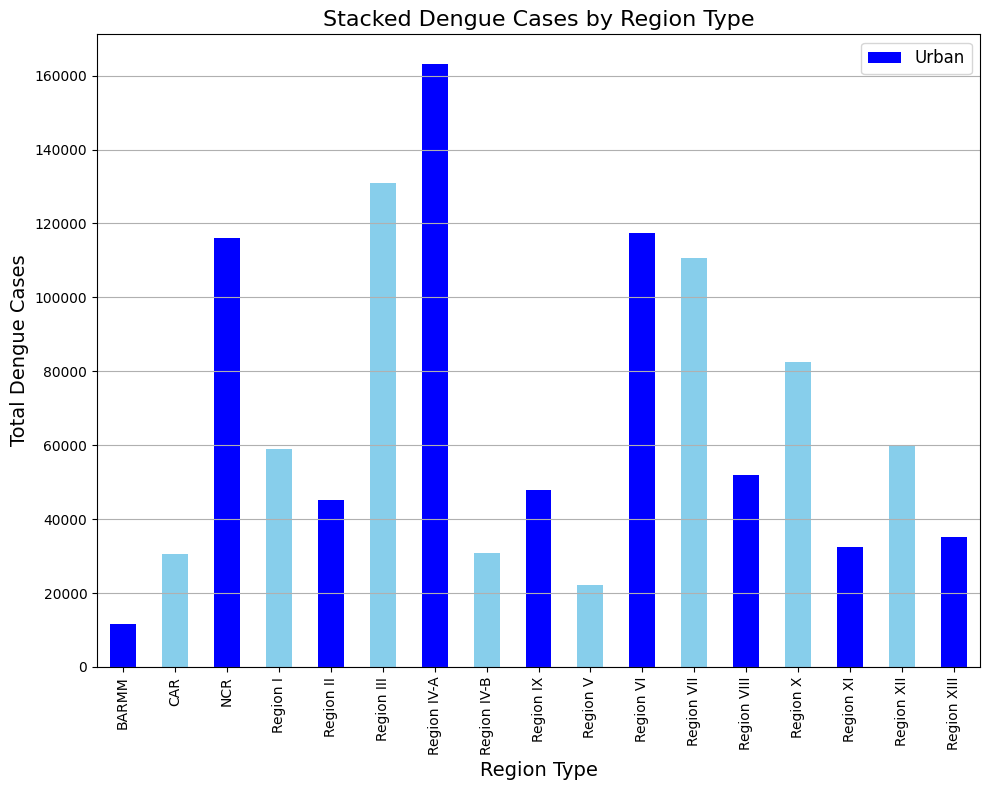

In [42]:
plt.figure(figsize=(10, 8)) 
urban_rural_data.plot(kind='bar', stacked=True, color=['blue', 'skyblue'])
plt.title('Stacked Dengue Cases by Region Type', fontsize=16)
plt.xlabel('Region Type', fontsize=14)
plt.ylabel('Total Dengue Cases', fontsize=14)
plt.legend(['Urban', 'Rural'], loc='upper right', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h1>Question 8.</h1>
<h2>What percentage of dengue deaths occurred in high-case regions?</h2>

In [26]:
average_cases = dengue_data['Dengue_Cases'].mean()
high_case_regions = dengue_data[dengue_data['Dengue_Cases'] > average_cases]
deaths_in_high_case_regions = high_case_regions['Dengue_Deaths'].sum()
total_deaths = dengue_data['Dengue_Deaths'].sum()
percentage_deaths_high_case = (deaths_in_high_case_regions / total_deaths) * 100
print("Dengue deaths in high-case regions:", percentage_deaths_high_case)

Dengue deaths in high-case regions: 31.120873901686057


<h1> Insight 8.1</h1>
<h2>Higher percentages of deaths in high-case regions suggest outbreaks stretching healthcare systems.</h2>

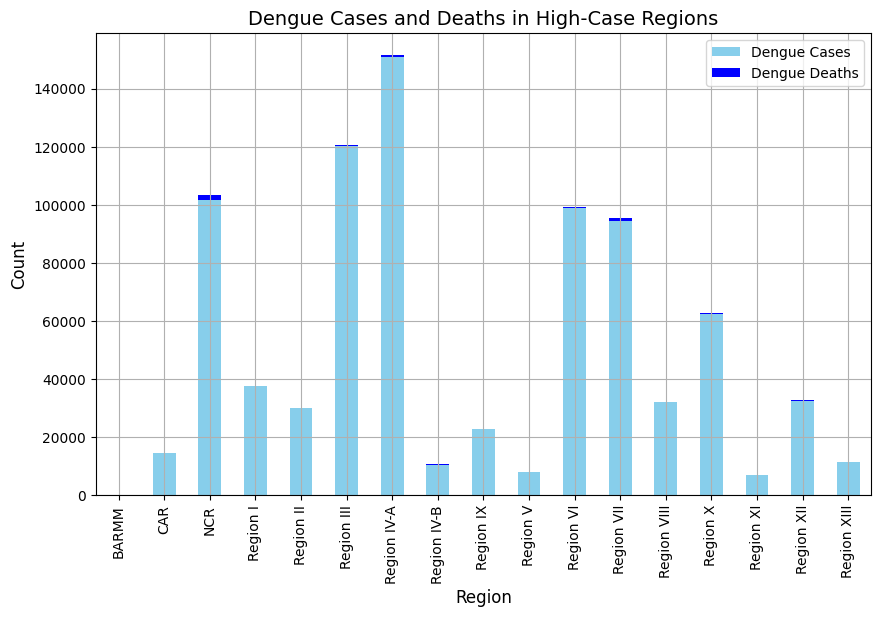

In [56]:
high_case_summary = high_case_regions.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
high_case_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'blue'])
plt.title('Dengue Cases and Deaths in High-Case Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Dengue Cases', 'Dengue Deaths'])
plt.grid()
plt.show()


<h1> Insight 8.2</h1>
<h2>Lower percentages show effective control measures despite the case numbers by using Pie Chart</h2>

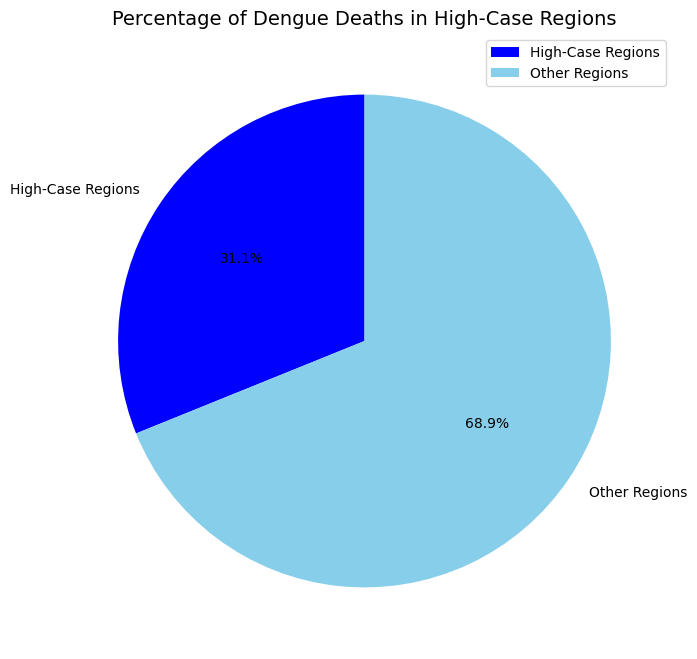

In [44]:
death_data = [deaths_in_high_case_regions, total_deaths - deaths_in_high_case_regions]

plt.figure(figsize=(8, 8))
plt.pie(death_data, labels=['High-Case Regions', 'Other Regions'], autopct='%1.1f%%', colors=['blue', 'skyblue'], startangle=90)
plt.title('Percentage of Dengue Deaths in High-Case Regions', fontsize=14)
plt.legend(['High-Case Regions', 'Other Regions'], loc='best', fontsize=10)
plt.show()

<h1> Question 9.</h1>
<h2>Which months show the highest mortality rates?</h2>

In [29]:
monthly_data = dengue_data.groupby('Month')[['Dengue_Deaths', 'Dengue_Cases']].sum()
monthly_data['Mortality_Rate'] = monthly_data['Dengue_Deaths'] / monthly_data['Dengue_Cases']
monthly_data


,Dengue_Deaths,Dengue_Cases,Mortality_Rate
Month,,,
April,200,32508,0.006152
August,714,187554,0.003807
December,404,88431,0.004569
February,315,77801,0.004049
January,394,84328,0.004672
July,611,138242,0.004420
June,322,58110,0.005541
March,291,57576,0.005054
May,162,32387,0.005002


<h1> Insight 9.1</h1>
<h2>Calculate monthly mortality rates and visualize them to identify spikes.</h2>

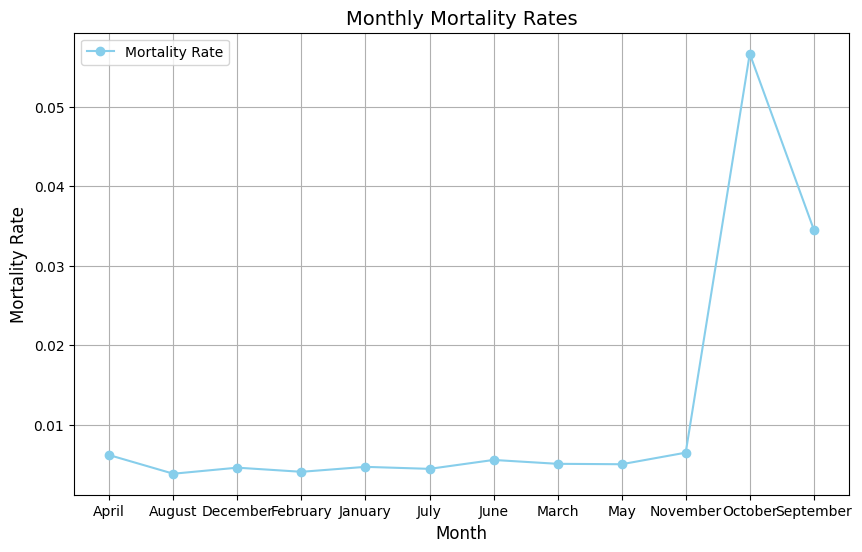

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Mortality_Rate'], marker='o', color='skyblue', label='Mortality Rate')
plt.title('Monthly Mortality Rates', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.grid()
plt.legend()
plt.show()

<h1> Insight 9.2</h1>
<h2>Months with the lowest death rates compared to cases can set examples for outbreak success.</h2>

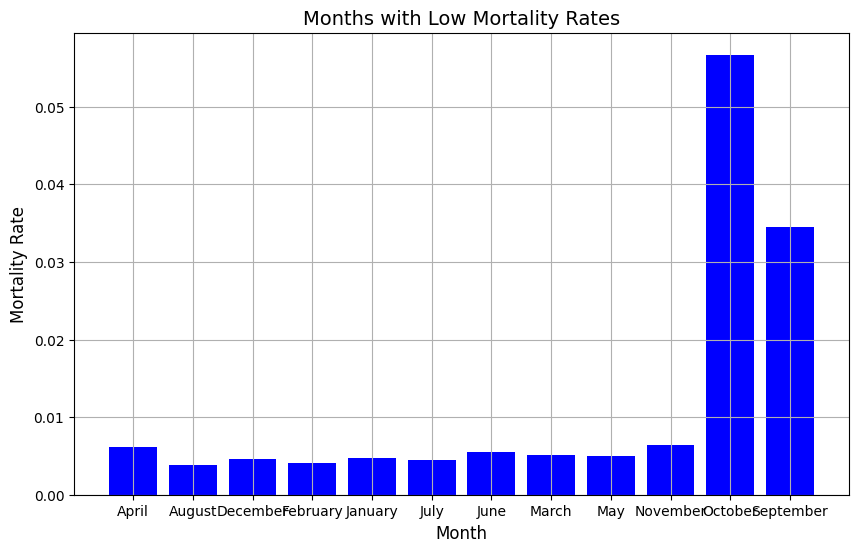

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_data.index, monthly_data['Mortality_Rate'], color='blue')
plt.title('Months with Low Mortality Rates', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.grid()
plt.show()

<h1> Question 10.</h1>
<h2>Which regions report the highest and lowest dengue cases and deaths?</h2>

In [32]:
region_data = dengue_data.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
region_data

,Dengue_Cases,Dengue_Deaths
Region,,
BARMM,11537,332
CAR,30582,1008
NCR,115966,4008
Region I,59066,157
Region II,45141,193
Region III,131064,482
Region IV-A,163029,652
Region IV-B,30849,130
Region IX,47781,532


<h1> Insight 10.1</h1>
<h2>Identifying regions with the highest burden by using barplot</h2>

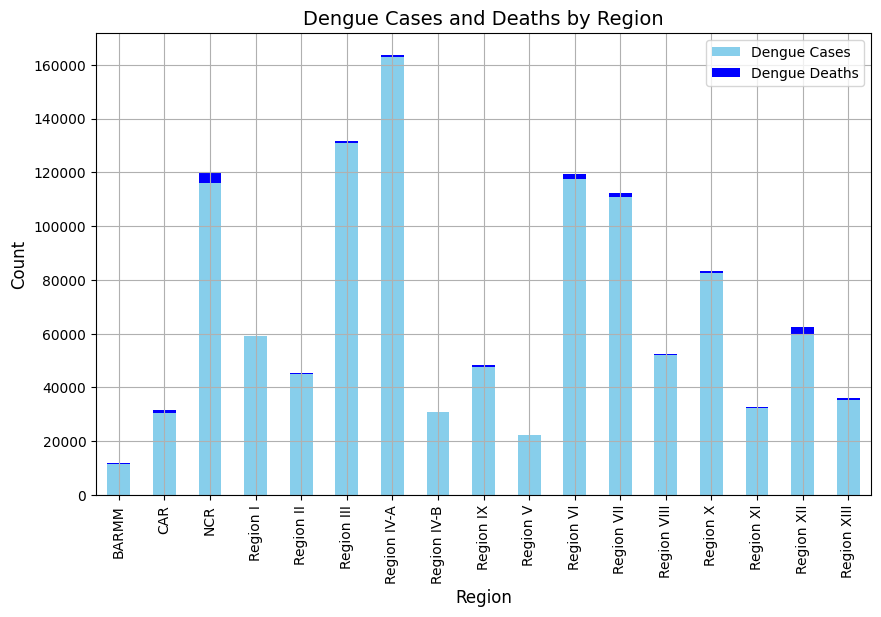

In [59]:
region_data = dengue_data.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

region_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'blue'])
plt.title('Dengue Cases and Deaths by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Dengue Cases', 'Dengue Deaths'])
plt.grid()
plt.show()


<h1> Insight 10.2</h1>
<h2>Regions with low cases and deaths</h2>

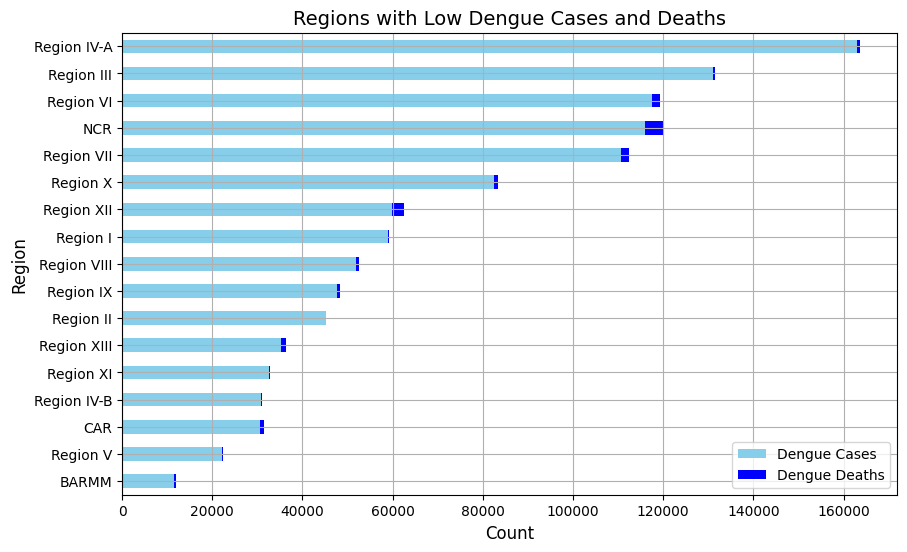

In [60]:
region_data_sort = region_data.sort_values('Dengue_Cases')
region_data_sort.plot(kind='barh', stacked=True, figsize=(10, 6), color=['skyblue', 'blue'])
plt.title('Regions with Low Dengue Cases and Deaths', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.legend(['Dengue Cases', 'Dengue Deaths'])
plt.grid()
plt.show()